In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class BarbasiAlbert: 
    def __init__(self, num_nodes:int, num_edges:int,random_seed:int, graph:nx.Graph) -> None:
        """calling the constructor of the graph """
        self.num_nodes = num_nodes 
        self.num_edges = num_edges 
        self.seed = np.random.seed(random_seed)
        self.graph = graph
        self.source_nodes = len(graph)
        self.repeated_nodes = self._get_repeated_nodes()
    
    def _get_repeated_nodes(self) -> list:
        """Function which gets the number of repeated nodes in the graph"""
        return [node for node, degree in self.graph.degree() for _ in range(degree)]

    def _get_random_node(self):
        """gets a subset to add a random edge and connection """
        subs = np.random.choice(self._get_repeated_nodes(), size=self.num_edges)
        return subs
    
    def _generate_graph(self):
        """Generates the BA graph"""
        ## set the repeated nodes to the function 
        
        ## condition holds true 
        while self.source_nodes < self.num_nodes:
            ## add the corresponding edges to the graph 
            # Code --> pick random node from the existing ones, of size m 
            self.graph.add_edges_from(zip([self.source_nodes]*self.num_edges, self._get_random_node()))
            ## extend the repeated nodes list 
            self.repeated_nodes.extend(self._get_random_node())
            ## extend the repeated nodes with source node * number_of_edges 
            self.repeated_nodes.extend([self.source_nodes] * self.num_edges)
            ## counter to increase the self.source_node 
            self.source_nodes += 1
        return self.graph 
    

In [9]:
from numba import jit
#@jit(nopython=True,parallel=True,nogil=True) ## fucking fast man!
def get_degree_matrix(adjacency_matrix:np.matrix) -> np.matrix:
    """Returns degree matrix from adjacency matrix"""
    ## create an empty matrix to return the values 
    empty_like = np.zeros_like(adjacency_matrix)
    ## calculate the rowsum 
    rowsum = np.sum(adjacency_matrix, axis=0)
    ## calculate the colsum & transpose 
    colsum = np.sum(adjacency_matrix, axis=1).T
    ## sum them 
    degrees = rowsum + colsum 
    ## fill the empty matrix 
    np.fill_diagonal(empty_like, degrees)
    return empty_like


In [ ]:

            if mat_copy[i,j] == -999:
                mat_copy[i,j] = 0
            ## if the value is not -999, then set the value to the sum of the row and column 
            else:
                mat_copy[i,j] = mat_copy[i,j] + mat_copy[i,j-1] + mat_copy[i-1,j]

In [62]:
len(triu_idx[1]), mat.shape

(28, (8, 8))

In [86]:
kk = np.triu(mat,k=1)
kk

array([[0, 1, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0]])

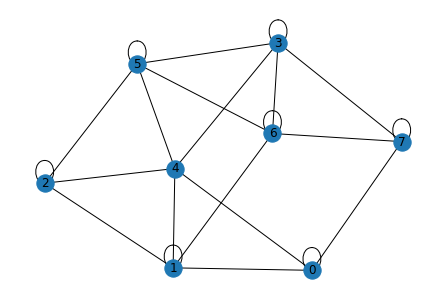

In [94]:
g = nx.from_numpy_matrix(mat,create_using=nx.MultiGraph,parallel_edges=False) ## works
nx.draw(g,with_labels=True)

## Explanation 



In [92]:
l = list(zip(triu_idx[0], triu_idx[1]))
for i in l:
    # print the current row 
    ## current row 
    row, col = i[0], i[1]
    ## print the sum of the row of the index
    #sum_row = np.sum(mat[i[1],:])
    ## print the row of the original matrix 
    tmp = np.triu(mat.copy(),k=1)
    frow = tmp[row,:]
    # get the sum of the row 
    rowsum = np.sum(frow)
    print(i, mat[i],frow, rowsum)
    

(0, 1) 1 [0 1 0 0 1 0 0 1] 3
(0, 2) 0 [0 1 0 0 1 0 0 1] 3
(0, 3) 0 [0 1 0 0 1 0 0 1] 3
(0, 4) 1 [0 1 0 0 1 0 0 1] 3
(0, 5) 0 [0 1 0 0 1 0 0 1] 3
(0, 6) 0 [0 1 0 0 1 0 0 1] 3
(0, 7) 1 [0 1 0 0 1 0 0 1] 3
(1, 2) 1 [0 0 1 0 1 0 1 0] 3
(1, 3) 0 [0 0 1 0 1 0 1 0] 3
(1, 4) 1 [0 0 1 0 1 0 1 0] 3
(1, 5) 0 [0 0 1 0 1 0 1 0] 3
(1, 6) 1 [0 0 1 0 1 0 1 0] 3
(1, 7) 0 [0 0 1 0 1 0 1 0] 3
(2, 3) 0 [0 0 0 0 1 1 0 0] 2
(2, 4) 1 [0 0 0 0 1 1 0 0] 2
(2, 5) 1 [0 0 0 0 1 1 0 0] 2
(2, 6) 0 [0 0 0 0 1 1 0 0] 2
(2, 7) 0 [0 0 0 0 1 1 0 0] 2
(3, 4) 1 [0 0 0 0 1 1 1 1] 4
(3, 5) 1 [0 0 0 0 1 1 1 1] 4
(3, 6) 1 [0 0 0 0 1 1 1 1] 4
(3, 7) 1 [0 0 0 0 1 1 1 1] 4
(4, 5) 1 [0 0 0 0 0 1 0 0] 1
(4, 6) 0 [0 0 0 0 0 1 0 0] 1
(4, 7) 0 [0 0 0 0 0 1 0 0] 1
(5, 6) 1 [0 0 0 0 0 0 1 0] 1
(5, 7) 0 [0 0 0 0 0 0 1 0] 1
(6, 7) 1 [0 0 0 0 0 0 0 1] 1


In [49]:
## make a random matrix with values 0,1 in the shape of (START_NODES,START_NODES)
mat = np.matrix(np.random.randint(0,2,(START_NODES,START_NODES)))
## fill the diagonal of the matrix with 0 
np.fill_diagonal(mat,0)
## indices of an upper triangle 
up_indices = np.triu_indices(mat.shape[0], k=1)
up_indices
print(uptr[up_indices])
print(mat)
## modify the up_indices of mat to be equal to -999
## copy 
mod_mat = mat.copy()
mod_mat[up_indices] = -999
print(mod_mat)
upper_tr = np.triu_indices_from(mat, k=1)

## function to replace a value in the upper triangle of a matrix chosen at random 
def replace_uptr_val(matrix:np.matrix) -> np.atrix:
    ## make a copy of the matrix
    cmatrix = matrix.copy()
    ## find the indices of the upper triangle
    triu_idx = np.triu_indices_from(matrix, k=1)
    ## choose a random indices from the upper triangle
    rand_triu_idx = np.random.choice(triu_idx[0])
    
    

[0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1]
[[0 1 0 1 1 0 0 0]
 [1 0 1 0 1 1 0 1]
 [0 0 0 0 1 0 0 1]
 [1 1 0 0 0 1 1 0]
 [1 1 1 1 0 0 1 0]
 [1 1 1 0 1 0 1 0]
 [1 0 0 0 1 1 0 1]
 [0 1 1 0 1 0 0 0]]
[[   0 -999 -999 -999 -999 -999 -999 -999]
 [   1    0 -999 -999 -999 -999 -999 -999]
 [   0    0    0 -999 -999 -999 -999 -999]
 [   1    1    0    0 -999 -999 -999 -999]
 [   1    1    1    1    0 -999 -999 -999]
 [   1    1    1    0    1    0 -999 -999]
 [   1    0    0    0    1    1    0 -999]
 [   0    1    1    0    1    0    0    0]]


In [40]:
at = np.matrix(np.random.randint(0,2,(START_NODES,START_NODES)))
## fill the diagonal of the matrix with 0 
np.fill_diagonal(mat,0)
## another way 
g = nx.from_numpy_matrix(mat,create_using=nx.MultiGraph,parallel_edges=False) ## works
## print the matrix 
print("The adjacency matrix is: \n",mat)
## get the upper triangular matrix of mat 
uptr = np.triu(mat,1)
print(f"The upper triangular matrix is: \n {uptr}")
degup= get_degree_matrix(uptr)
print(f"The degree matrix is: \n {degup}")

The adjacency matrix is: 
 [[0 0 0 1 0 1 1 0]
 [0 0 0 1 1 0 0 1]
 [1 0 0 0 0 0 1 1]
 [0 1 0 0 1 1 0 1]
 [1 0 1 1 0 1 1 0]
 [1 1 0 1 0 0 0 1]
 [1 1 0 1 1 1 0 1]
 [0 1 0 0 0 0 1 0]]
The upper triangular matrix is: 
 [[0 0 0 1 0 1 1 0]
 [0 0 0 1 1 0 0 1]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 1 1 0 1]
 [0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]
The degree matrix is: 
 [[3 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0]
 [0 0 0 5 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 5]]


In [ ]:
## basing method to make a class 
class MatrixGraph:
    def __init__(self, n:int, m:int, num_edges:int):
        self.n = n
        self.m = m
        self.num_edges = num_edges

In [138]:
import seaborn as sns

[[0.         0.85303037 0.8365128  0.78537833 0.36872033 0.42087282
  0.29877102 0.19132514 0.50018814 0.6682145 ]
 [0.         0.         0.66141467 0.60098137 0.31238757 0.46587904
  0.02248031 0.83407236 0.15088343 0.49852893]
 [0.         0.         0.         0.26063771 0.27770625 0.06608244
  0.10503211 0.16473753 0.79102249 0.25044977]
 [0.         0.         0.         0.         0.98400574 0.24184832
  0.44597729 0.209447   0.47996499 0.8829075 ]
 [0.         0.         0.         0.         0.         0.88450172
  0.02668014 0.43405258 0.50592073 0.09717529]
 [0.         0.         0.         0.         0.         0.
  0.7410723  0.55209284 0.16911778 0.31077426]
 [0.         0.         0.         0.         0.         0.
  0.         0.58348238 0.55477182 0.81927876]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.67329857 0.75820922]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.1925191

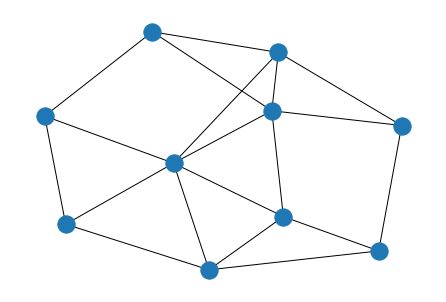

In [292]:
n_nodes = 10
proba = 0.4
pmat = np.zeros(shape=(n_nodes,n_nodes))
## get indices for any NxN matrix
triu_idx = np.triu_indices(n_nodes, k=1)
## fill the upper triangle with random values from a uniform distribution
pmat[triu_idx] = np.random.uniform(0,1,size=(len(triu_idx[0])))
print(pmat)
## check all the values if greater than the probability
pmat = np.where(pmat<proba,1,0)
np.fill_diagonal(pmat,0)
print(pmat)
gq = nx.from_numpy_matrix(pmat,create_using=nx.MultiGraph,parallel_edges=True)
nx.draw(gq)


In [329]:

def erdos_renyi_fill(n_nodes:int, probability:float,init_method:str='random') -> np.matrix:
    """This methods casts the probability to the randomly initiated matrix
    such that it will only keep the True values remain in the matrix.
    It follows a similar approach to the nx.erdos_renyi_graph(), but it is 
    in the form of the Adjacency Matrix, for which the degree matrix can also
    be used to make sure that the method works correctly. 
    Steps:
    - Initiate a matrix (Nodes, Nodes) with all values drawn from a 
    random uniform distribution (low=0, high=2). 
    - apply the probability directly to all the values. 
    - keep the True values
    """
    if init_method == 'random':
        ## initiate a matrix (Nodes, Nodes), filled with 0s
        zmat = np.random.uniform(size=(n_nodes,n_nodes))
        ## get the indices of the upper triangle
        triu_idx = np.triu_indices(n_nodes, k=1)
        ## fill the upper triangle with the probability
        zmat[triu_idx] = np.random.uniform(size=(len(triu_idx[0])))
        ## check all the values if greater than the probability
        zmat = np.where(zmat<probability,1,0)
        np.fill_diagonal(zmat,0)
        ## return the matrix
        return zmat
    
    if init_method == 'fc':
        ## generate a fully connected graph
        fmat = np.ones((n_nodes,n_nodes))
        ## remove the diagonal
        np.fill_diagonal(fmat,0)
        ## return the matrix    
        return fmat

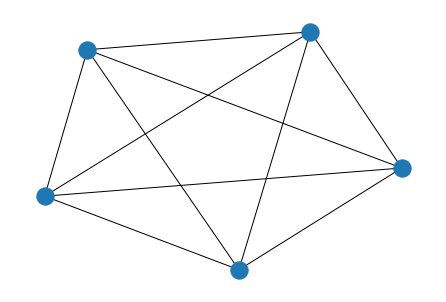

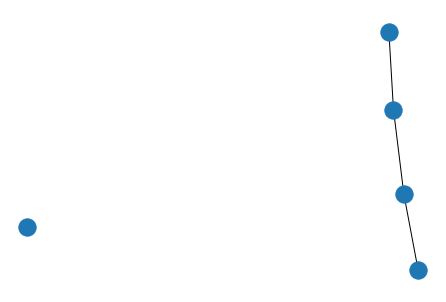

In [335]:
NODES=5
PROB = 0.5
## preallocating 
gfc = erdos_renyi_fill(NODES,PROB,init_method='fc')
gran = erdos_renyi_fill(NODES,PROB,init_method='random')
gfc = nx.from_numpy_matrix(gfc,create_using=nx.MultiGraph,parallel_edges=True)
gran = nx.from_numpy_matrix(gran,create_using=nx.MultiGraph,parallel_edges=True)
nx.draw(gfc)
plt.show()
nx.draw(gran)
plt.show()




In [317]:
NODES=5
PROB = 0.5
## preallocating 
erdos_renyi_fill(NODES,PROB)

array([[0, 0, 0, 1, 1],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

In [244]:
##
PROB = 0.9
NODES = 105
seed = np.random.seed(42)

In [290]:
l = [1,2,3,4]
l = np.zeros_like(l,dtype=float)
print(l)
for idx,i in enumerate(l):
    l[idx] = np.random.uniform(0,1)
print(l)

[0. 0. 0. 0.]
[0.57982167 0.73859143 0.67149183 0.95851734]


In [291]:
graph_list = [gt,gy]
## create a 3x3 figure to plot 
fig,axs=plt.subplots(len(graph_list),3,figsize=(10,10))
for idx,x in enumerate(graph_list):
    ## plot the graph on the first column 
    nx.draw(x, ax=axs[idx,0],with_labels=True)
    ## plot the histogram of the degree distribution on the second column
    axs[idx,1].hist(list(dict(x.degree()).values()),bins=20)
    ## plot the density of the degree distribution on the third column
    sns.distplot(list(dict(x.degree()).values()),ax=axs[idx,2],kde=True)
plt.show()


NameError: name 'gt' is not defined

The adjacency matrix is: 
 [[0 1 1 0 0 1 0 0]
 [0 0 0 1 0 1 0 1]
 [0 0 0 1 0 1 1 0]
 [1 1 1 0 1 1 1 1]
 [1 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1]
 [0 0 1 0 1 0 0 1]
 [0 0 1 0 0 0 1 0]]
The upper triangular matrix is: 
 [[0 1 1 0 0 1 0 0]
 [0 0 0 1 0 1 0 1]
 [0 0 0 1 0 1 1 0]
 [0 0 0 0 1 1 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]
The degree matrix is: 
 [[3 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0]
 [0 0 0 6 0 0 0 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 0 7 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 4]]
upper triangle


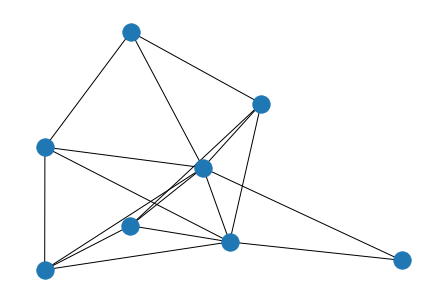

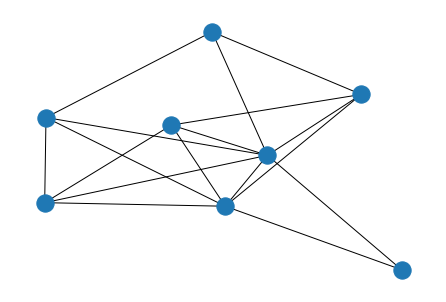

The degree of g is: [(0, 3), (1, 4), (2, 4), (3, 6), (4, 2), (5, 7), (6, 4), (7, 4)] 
 The degree of g3 is: [(0, 3), (1, 4), (2, 4), (3, 6), (4, 2), (5, 7), (6, 4), (7, 4)]
Equal? True


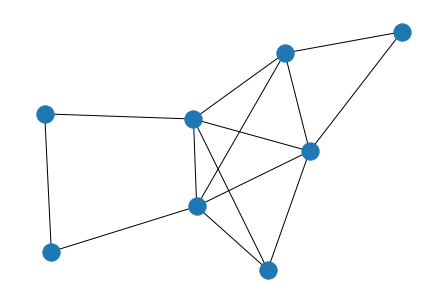

In [158]:
## parameters for the graph 
NODES = 50
START_NODES = 8
EDGES = 3
## make a random matrix with values 0,1 in the shape of (START_NODES,START_NODES)
mat = np.matrix(np.random.randint(0,2,(START_NODES,START_NODES)))
## fill the diagonal of the matrix with 0 
np.fill_diagonal(mat,0)
## another way 
g = nx.from_numpy_matrix(mat,create_using=nx.MultiGraph,parallel_edges=False) ## works
## print the matrix 
print("The adjacency matrix is: \n",mat)
## get the upper triangular matrix of mat 
uptr = np.triu(mat,1)
print(f"The upper triangular matrix is: \n {uptr}")
degup= get_degree_matrix(uptr)
print(f"The degree matrix is: \n {degup}")
g3 = nx.from_numpy_matrix(uptr,create_using=nx.MultiGraph,parallel_edges=False) ## works
print("upper triangle")
## degrees of each graph 
deg_g = np.array(nx.degree(g))
deg_g3 = np.array(nx.degree(g3))
nx.draw(g)
plt.show()
nx.draw(g3)
plt.show()
## print the degree of both g and g3
print(f"The degree of g is: {nx.degree(g)} \n The degree of g3 is: {nx.degree(g3)}")
## check whether the degrees are equal 
print(f"Equal? {(deg_g==deg_g3).all()}")
g4 = nx.erdos_renyi_graph(n=START_NODES,p=0.5)
nx.draw(g4)

## plot the degree distributions 
h1 = nx.degree_histogram(g)
h2 = nx.degree_histogram(g3)


matrix([[0, 1, 1, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 0, 0, 1, 0, 1, 1],
        [1, 1, 1, 0, 0, 1, 1, 0],
        [0, 1, 1, 0, 0, 1, 1, 0],
        [0, 1, 1, 0, 1, 0, 1, 1],
        [1, 1, 0, 1, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 1, 1, 0]])

/Users/Eric/opt/anaconda3/envs/ci_covid/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Eric/opt/anaconda3/envs/ci_covid/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Eric/opt/anaconda3/envs/ci_covid/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

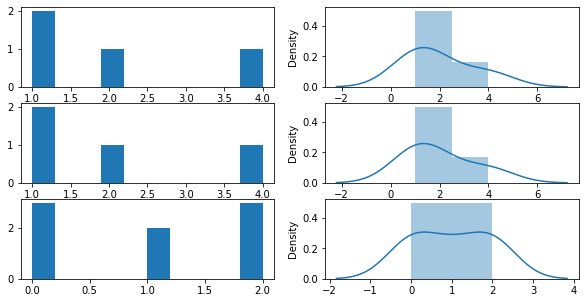

In [150]:
## show all their histograms 
def show_histogram(graph_list:nx.Graph) -> None:
    ## make a figure the size of the number of graphs
    fig, axs = plt.subplots(len(graph_list),2,figsize=(10,5))
    axs = axs.ravel()
    ## iterate over the axes 
    for idx,_ in enumerate(axs):
        ## get only the left column    
        ## plot the degree distribution of the graph
        axs[idx].hist(nx.degree_histogram(graph_list[idx]))
        ## if density is true, plot the density of the graph
        sns.distplot(nx.degree_histogram(graph_list[idx]), kde=True, ax=axs[idx+1])
    plt.show()

##

gs = [g,g3,g4]
## create a figure with the size of the number of graphs
## two plots will be shown: the histogram and the density
ncols = 2
nrows = len(gs)
fig, axs = plt.subplots(nrows,ncols,figsize=(10,5))
## plot the histogram on the left column
for idx,_ in enumerate(axs):
    axs[idx,0].hist(nx.degree_histogram(gs[idx]))
    sns.distplot(nx.degree_histogram(gs[idx]), kde=True, ax=axs[idx,1])

/Users/Eric/opt/anaconda3/envs/ci_covid/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Eric/opt/anaconda3/envs/ci_covid/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Eric/opt/anaconda3/envs/ci_covid/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

IndexError: list index out of range

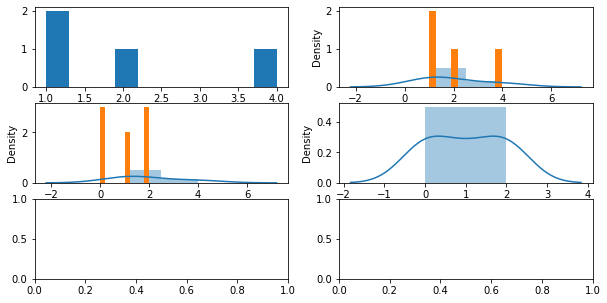

In [146]:
## show the histograms
gs = [g,g3,g4]
show_histogram(gs)
## plot the degree distribution of the graph

The adjacency matrix is: 
 [[0 1 0 0 1 0 0 1]
 [0 0 1 0 1 0 1 0]
 [0 0 0 0 1 1 0 0]
 [0 1 1 0 1 1 1 1]
 [1 1 0 1 0 1 0 0]
 [0 1 1 0 1 0 1 0]
 [0 0 1 1 0 1 0 1]
 [0 0 1 1 1 1 0 0]]
The upper triangular matrix is: 
 [[0 1 0 0 1 0 0 1]
 [0 0 1 0 1 0 1 0]
 [0 0 0 0 1 1 0 0]
 [0 0 0 0 1 1 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]
The degree matrix is: 
 [[3 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 5 0 0 0]
 [0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 3]]
upper triangle


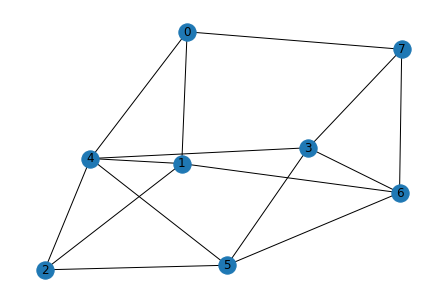

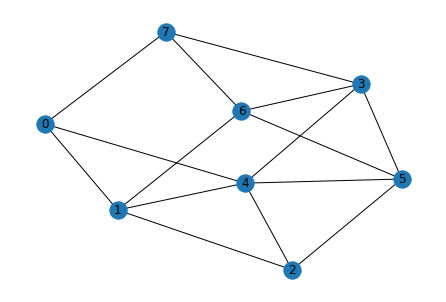

The modified adjacency matrix is: 
 [[2 1 0 0 1 0 0 1]
 [0 1 1 0 1 0 1 0]
 [0 0 2 0 1 1 0 0]
 [0 1 1 1 1 1 1 1]
 [1 1 0 1 0 1 0 0]
 [0 1 1 0 1 1 1 0]
 [0 0 1 1 0 1 1 1]
 [0 0 1 1 1 1 0 2]]
The modified upper triangular matrix is: 
 [[0 1 0 0 1 0 0 1]
 [0 0 1 0 1 0 1 0]
 [0 0 0 0 1 1 0 0]
 [0 0 0 0 1 1 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]
The modified degree matrix is: 
 [[3 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 5 0 0 0]
 [0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 3]]


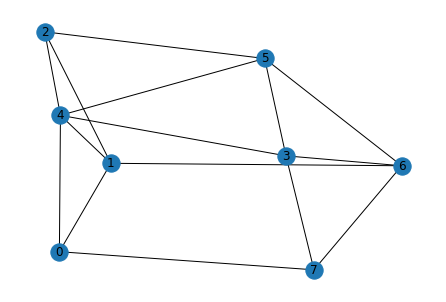

In [58]:
## parameters for the graph 
NODES = 50
START_NODES = 8
EDGES = 3
## make a random matrix with values 0,1 in the shape of (START_NODES,START_NODES)
mat = np.matrix(np.random.randint(0,2,(START_NODES,START_NODES)))
## fill the diagonal of the matrix with 0 
np.fill_diagonal(mat,0)
## another way 
g = nx.from_numpy_matrix(mat,create_using=nx.MultiGraph,parallel_edges=False) ## works
## print the matrix 
print("The adjacency matrix is: \n",mat)
## get the upper triangular matrix of mat 
uptr = np.triu(mat,1)
print(f"The upper triangular matrix is: \n {uptr}")
degup= get_degree_matrix(uptr)
print(f"The degree matrix is: \n {degup}")
g3 = nx.from_numpy_matrix(uptr,create_using=nx.MultiGraph,parallel_edges=False) ## works
print("upper triangle")

nx.draw(g3, with_labels=True)
plt.show()

nx.draw(g, with_labels=True)
plt.show()


## we work with the upper triangular matrix
## create a function such that the generated degree matrix has a maximum value in the diagonal
## modifying the original adjacency matrix 
def mod_adj_matrix(adj_matrix:np.matrix, max_deg:int) -> np.matrix:
    """Modifies the adjacency matrix to have a maximum degree in the diagonal"""
    ## get the upper triangular matrix 
    uptr = np.triu(adj_matrix,1)
    ## get the degree matrix 
    deg_mat = get_degree_matrix(uptr)
    ## get the diagonal of the degree matrix 
    diag = np.diag(deg_mat)
    ## get the maximum degree 
    max_deg = np.max(diag)
    ## get the difference 
    diff = max_deg - diag
    ## fill the diagonal with the difference 
    np.fill_diagonal(adj_matrix, diff)
    return adj_matrix
## modify the adjacency matrix
mod_adj = mod_adj_matrix(mat,EDGES)
print(f"The modified adjacency matrix is: \n {mod_adj}")
mod_upper = np.triu(mod_adj,1)
print(f"The modified upper triangular matrix is: \n {mod_upper}")
mod_deg = get_degree_matrix(mod_upper)
print(f"The modified degree matrix is: \n {mod_deg}")
## generate the graph
g1 = nx.from_numpy_matrix(mod_upper,create_using=nx.MultiGraph,parallel_edges=False)
# display 
nx.draw(g1, with_labels=True)
plt.show()

/var/folders/bd/f5z4cc193xgdxq1yr1xpflmm0000gn/T/ipykernel_20382/1656015296.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjm = np.matrix(nx.adjacency_matrix(g).toarray())


NameError: name 'degm' is not defined

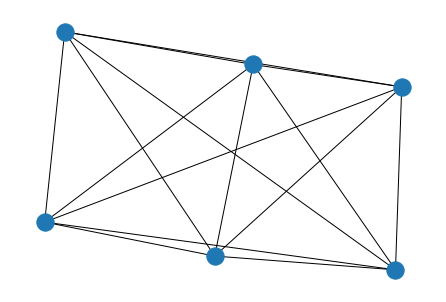

In [4]:
NODES = 50
START_NODES = 6
EDGES = 2
## generate a random graph from a numpy matrix with no self loops 
mat = np.random.randint(START_NODES,size=(START_NODES,START_NODES))
## remove the self-loops 
np.fill_diagonal(mat, 0)
g = nx.from_numpy_matrix(A=mat, parallel_edges=False)
nx.draw(g)
adjm = np.matrix(nx.adjacency_matrix(g).toarray())
degm 
print(adjm)
## that is our initial connected graph 

In [ ]:
## define a function to randomly replace values in a matrix such that the diagonal sum is a specified value, m 
def even_out_diagona(matrix:np.matrix, edges:int) -> np.matrix:
    """
    function which takes in a matrix (N,N) and replaces random values at [i,j] such that the 
    diagonal sum is less than or equal to edges
    """
    ## iterate over the matrix 
    for 

In [ ]:
NODES = 50
EDGES = 2
## generate a random graph from a numpy matrix with no self loops 
#mat = np.random.randint(NODES, size=(NODES,NODES))
## remove the self-loops 
np.fill_diagonal(mat, 0)
## convert into a graph 
g = nx.from_numpy_matrix(mat)
## display graph 
nx.draw(g)

In [ ]:
## instantiate a Barbasi-Albert Graph 
G = BarbasiAlbert(num_nodes = NODES, 
                  num_edges = EDGES,
                  random_seed = 42,
                  graph=g)._generate_graph()
nx.draw(G)